In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Final Version

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import pickle

# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0  # Normalize pixel values to [0, 1]
test_images = test_images / 255.0    # Normalize pixel values to [0, 1]

train_images = np.expand_dims(train_images, axis=-1)  # Reshape to (n_samples, 28, 28, 1)
test_images = np.expand_dims(test_images, axis=-1)    # Reshape to (n_samples, 28, 28, 1)

train_labels_bin = tf.keras.utils.to_categorical(train_labels, 10)
test_labels_bin = tf.keras.utils.to_categorical(test_labels, 10)

# Custom activation function: 2*sin^2(x)
def custom_activation(x):
    return tf.where(x < 0.0, 0.0, tf.sin(x) * (tf.sin(x) + tf.sin(x)))

# Function to build and compile model
def build_model(activation):
    model = models.Sequential([
        layers.Conv2D(128, (3, 3), activation=activation, input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation=activation),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Build models
model_custom = build_model(custom_activation)
model_relu = build_model('relu')
model_leaky_relu = build_model(layers.LeakyReLU(alpha=0.321))
model_elu = build_model('elu')

# Train models
history_custom = model_custom.fit(train_images, train_labels_bin, epochs=10, validation_data=(test_images, test_labels_bin))
history_relu = model_relu.fit(train_images, train_labels_bin, epochs=10, validation_data=(test_images, test_labels_bin))
history_leaky_relu = model_leaky_relu.fit(train_images, train_labels_bin, epochs=10, validation_data=(test_images, test_labels_bin))
history_elu = model_elu.fit(train_images, train_labels_bin, epochs=10, validation_data=(test_images, test_labels_bin))

# Predict and evaluate
def evaluate_model(model):
    predictions = model.predict(test_images)
    pred_labels = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(test_labels, pred_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(test_labels, pred_labels, average='macro')
    return accuracy, precision, recall, f1

metrics_custom = evaluate_model(model_custom)
metrics_relu = evaluate_model(model_relu)
metrics_leaky_relu = evaluate_model(model_leaky_relu)
metrics_elu = evaluate_model(model_elu)

# Display metrics in a table
metrics_df = pd.DataFrame({
    'Model': ['RectifiedSineUnit (RSU)', 'ReLU', 'Leaky ReLU', 'ELU'],
    'Accuracy': [metrics_custom[0], metrics_relu[0], metrics_leaky_relu[0], metrics_elu[0]],
    'Precision': [metrics_custom[1], metrics_relu[1], metrics_leaky_relu[1], metrics_elu[1]],
    'Recall': [metrics_custom[2], metrics_relu[2], metrics_leaky_relu[2], metrics_elu[2]],
    'F1 Score': [metrics_custom[3], metrics_relu[3], metrics_leaky_relu[3], metrics_elu[3]]
})

print(metrics_df)

# Find the model with the highest accuracy
models_and_accuracies = {
    'RectifiedSineUnit (RSU)': (model_custom, metrics_custom[0]),
    'ReLU': (model_relu, metrics_relu[0]),
    'Leaky ReLU': (model_leaky_relu, metrics_leaky_relu[0]),
    'ELU': (model_elu, metrics_elu[0])
}

best_model_name, (best_model, best_accuracy) = max(models_and_accuracies.items(), key=lambda x: x[1][1])

# Save the best model
with open(f'{best_model_name.replace(" ", "_").replace("(", "").replace(")", "")}_best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print(f"The model with the highest accuracy ({best_accuracy:.2f}) is '{best_model_name}', and it has been saved.")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10


I0000 00:00:1734948701.776181     108 service.cc:145] XLA service 0x7c50b80032f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734948701.776226     108 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734948701.776230     108 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  52/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3511 - loss: 1.9097

I0000 00:00:1734948706.312202     108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9091 - loss: 0.2993 - val_accuracy: 0.9855 - val_loss: 0.0484
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9892 - loss: 0.0354 - val_accuracy: 0.9882 - val_loss: 0.0343
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9948 - loss: 0.0184 - val_accuracy: 0.9900 - val_loss: 0.0307
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9965 - loss: 0.0120 - val_accuracy: 0.9915 - val_loss: 0.0265
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9973 - loss: 0.0082 - val_accuracy: 0.9899 - val_loss: 0.0315
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9978 - loss: 0.0071 - val_accuracy: 0.9904 - val_loss: 0.0326
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9985 - loss: 0.0059 - val_accuracy: 0.9932 - val_loss: 0.0247
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9992 - loss: 0.0030 - val_accura

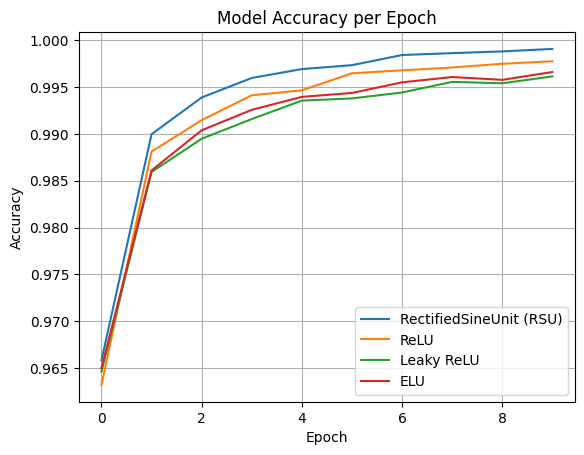

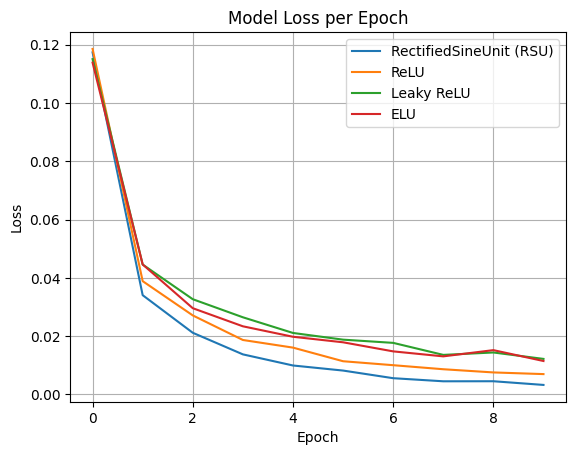

In [3]:
import matplotlib.pyplot as plt 
# Plot accuracy and loss for each model
plt.plot(history_custom.history['accuracy'], label='RectifiedSineUnit (RSU)')
plt.plot(history_relu.history['accuracy'], label='ReLU')
plt.plot(history_leaky_relu.history['accuracy'], label='Leaky ReLU')
plt.plot(history_elu.history['accuracy'], label='ELU')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.savefig('Accuracy_per_epoch.png',dpi=300)
plt.figure()
plt.plot(history_custom.history['loss'], label='RectifiedSineUnit (RSU)')
plt.plot(history_relu.history['loss'], label='ReLU')
plt.plot(history_leaky_relu.history['loss'], label='Leaky ReLU')
plt.plot(history_elu.history['loss'], label='ELU')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.savefig('Loss_per_epoch.png',dpi=300)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


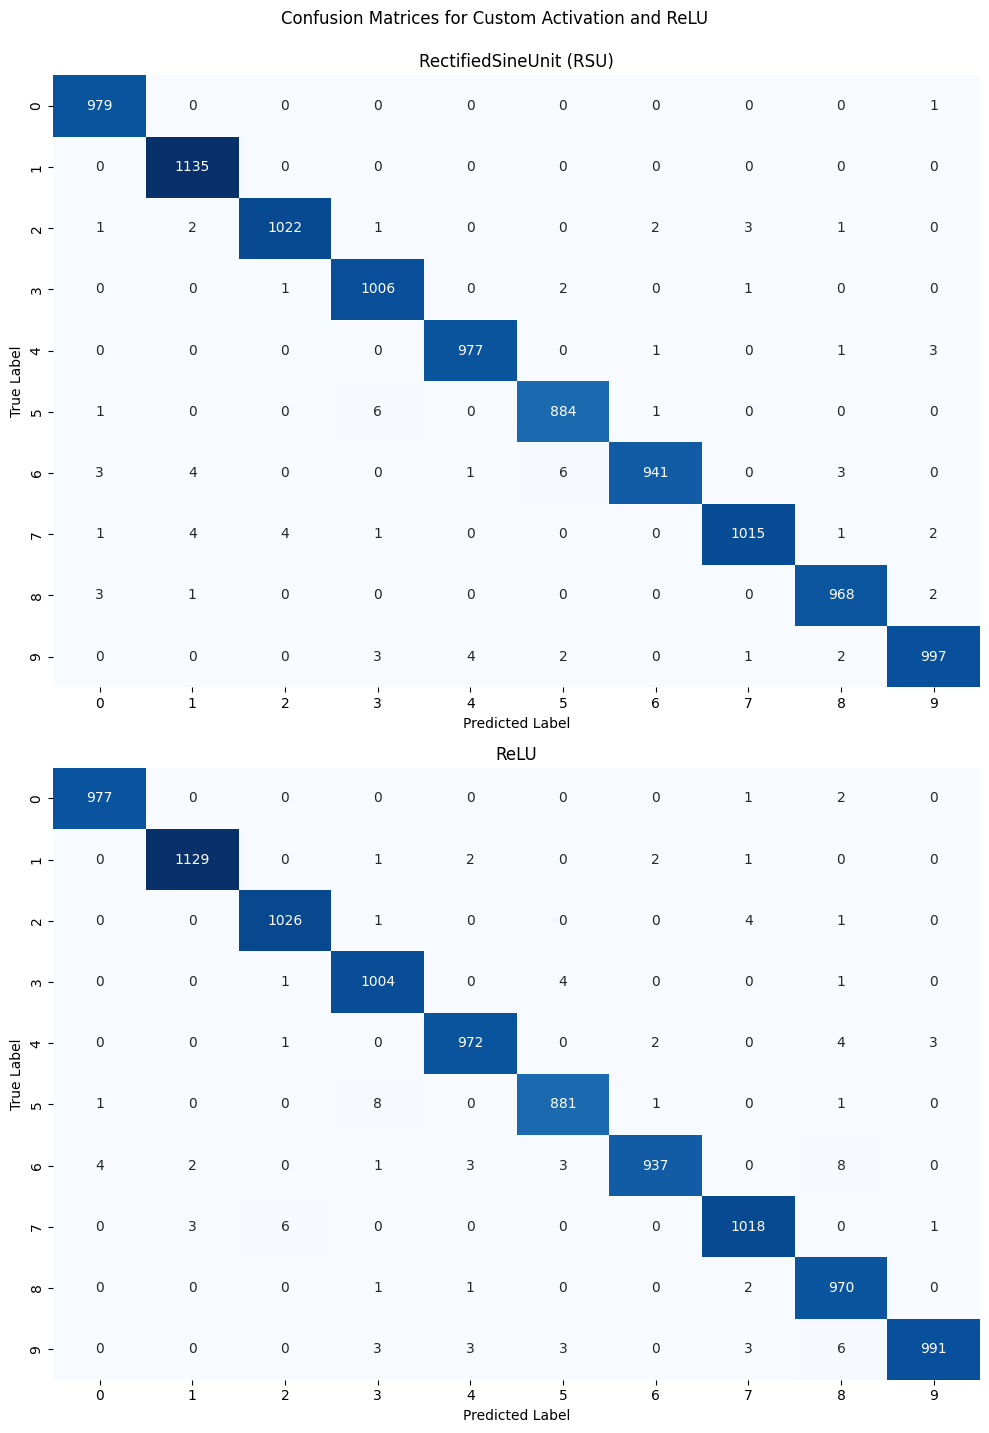

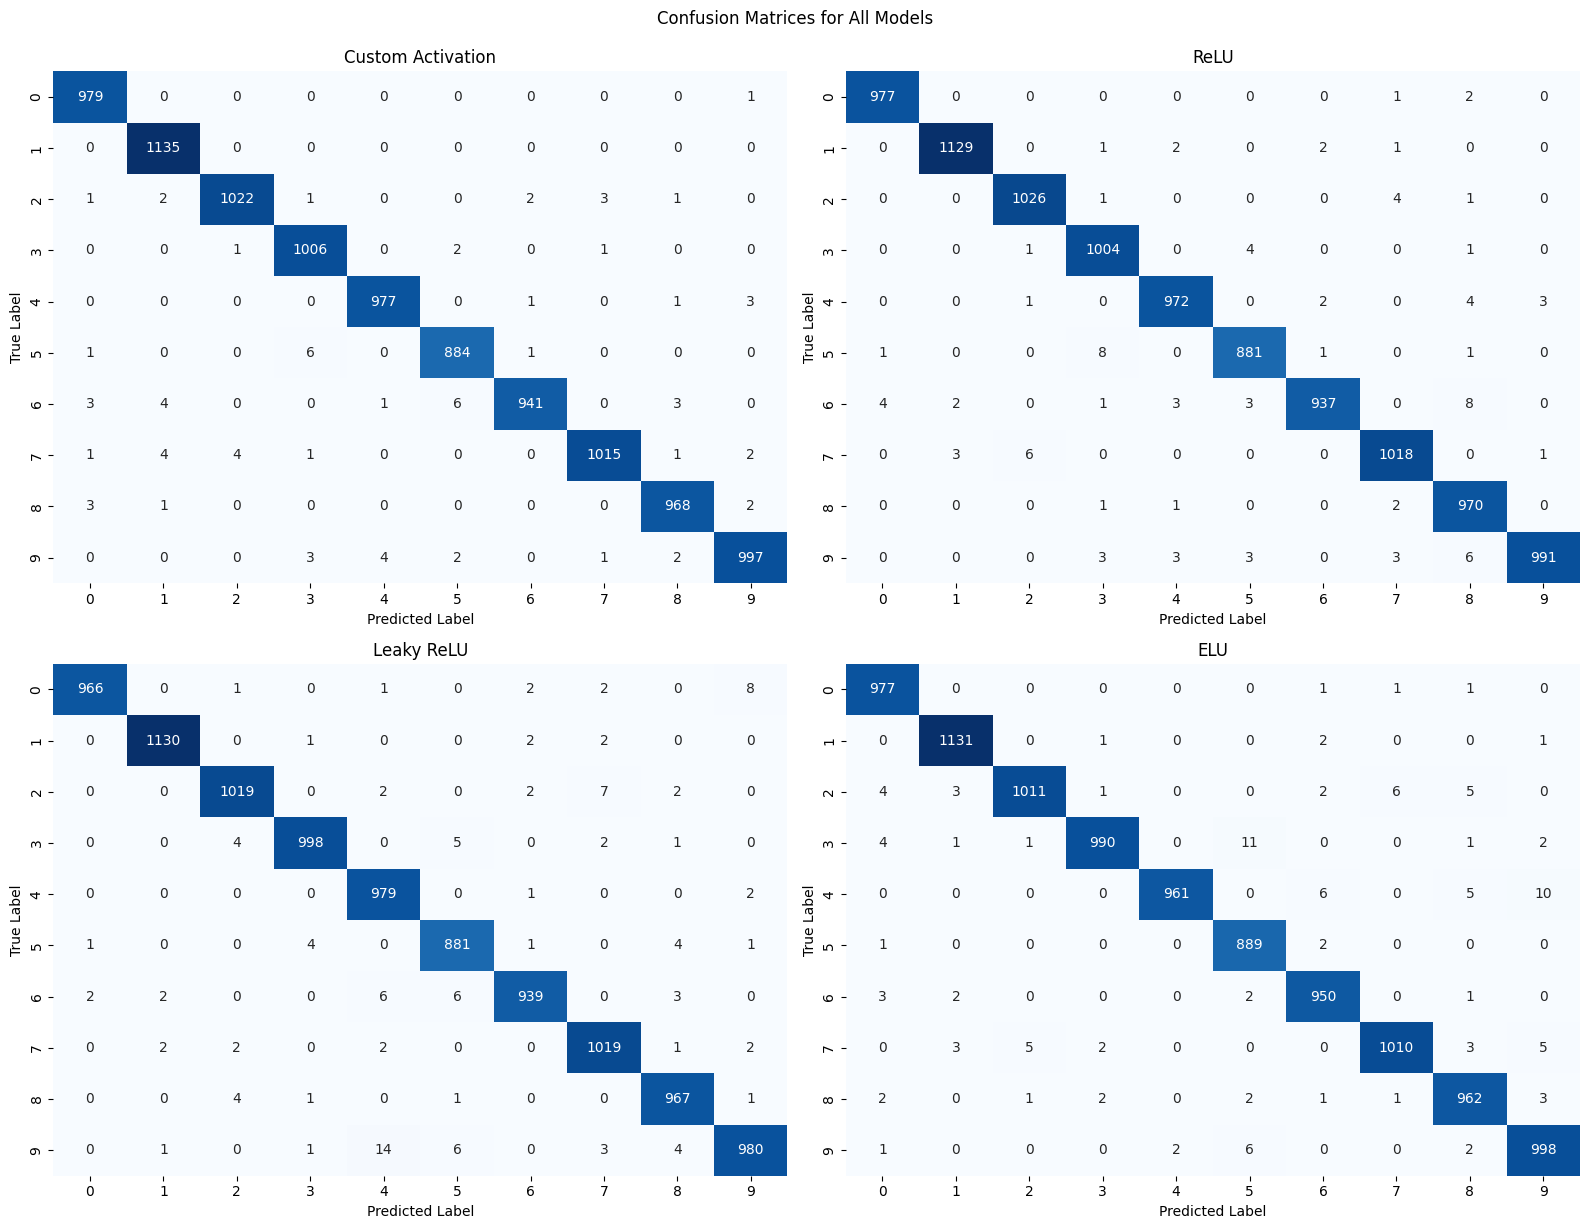

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assume models have been trained as per the previous code

# Function to generate confusion matrix for a model
def generate_confusion_matrix(model, ax, title):
    predictions = model.predict(test_images)
    pred_labels = np.argmax(predictions, axis=1)
    
    # Generate confusion matrix
    cm = confusion_matrix(test_labels, pred_labels)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.arange(10), yticklabels=np.arange(10), ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(title)

# Create the first figure with a 2x1 subplot layout
fig1, axes1 = plt.subplots(2, 1, figsize=(10, 14))
generate_confusion_matrix(model_custom, axes1[0], 'RectifiedSineUnit (RSU)')
generate_confusion_matrix(model_relu, axes1[1], 'ReLU')
fig1.tight_layout()
fig1.suptitle('Confusion Matrices for Custom Activation and ReLU', y=1.02)
fig1.savefig('confusion_matrices_2x1.png', dpi=300)

# Create the second figure with a 2x2 subplot layout
fig2, axes2 = plt.subplots(2, 2, figsize=(16, 12))
generate_confusion_matrix(model_custom, axes2[0, 0], 'Custom Activation')
generate_confusion_matrix(model_relu, axes2[0, 1], 'ReLU')
generate_confusion_matrix(model_leaky_relu, axes2[1, 0], 'Leaky ReLU')
generate_confusion_matrix(model_elu, axes2[1, 1], 'ELU')
fig2.tight_layout()
fig2.suptitle('Confusion Matrices for All Models', y=1.02)
fig2.savefig('confusion_matrices_2x2.png', dpi=300)

# Show plots
plt.show()


In [5]:
import pandas as pd

# Function to calculate true and false predictions
def calculate_predictions(model, model_name):
    predictions = model.predict(test_images)
    pred_labels = np.argmax(predictions, axis=1)
    
    true_predictions = np.sum(pred_labels == test_labels)
    false_predictions = np.sum(pred_labels != test_labels)
    
    total_data = len(test_labels)
    
    return {
        "Model": model_name,
        "True Predictions": true_predictions,
        "False Predictions": false_predictions,
        "Total Data": total_data
    }

# Calculate predictions for all models
results = []
results.append(calculate_predictions(model_custom, 'RectifiedSineUnit (RSU)'))
results.append(calculate_predictions(model_relu, 'ReLU'))
results.append(calculate_predictions(model_leaky_relu, 'Leaky ReLU'))
results.append(calculate_predictions(model_elu, 'ELU'))

# Create a DataFrame to display the results in a table
df_results = pd.DataFrame(results)

# Display the table
print(df_results)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
                     Model  True Predictions  False Predictions  Total Data
0  RectifiedSineUnit (RSU)              9924                 76       10000
1                     ReLU              9905                 95       10000
2               Leaky ReLU              9878                122       10000
3                      ELU              9879                121       10000


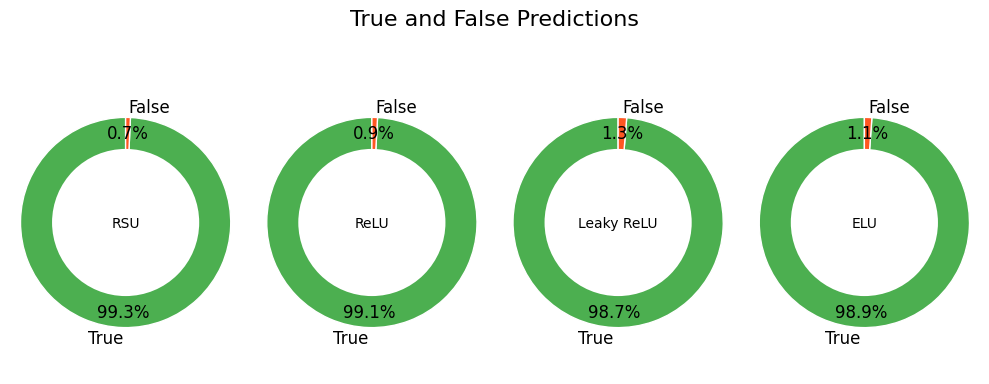

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the table
model_data = {
    'Model': ['RSU', 'ReLU', 'Leaky ReLU', 'ELU'],
    'True Predictions': [9927, 9914, 9870, 9886],
    'False Predictions': [73, 86, 130, 114],
}

df = pd.DataFrame(model_data)

# Create donut plots
fig, axs = plt.subplots(1, 4, figsize=(10, 4))
fig.suptitle('True and False Predictions', fontsize=16)

for ax, model, true, false in zip(axs.flatten(), df['Model'], df['True Predictions'], df['False Predictions']):
    sizes = [true, false]
    colors = ['#4CAF50', '#FF5722']
    wedges, texts, autotexts = ax.pie(
        sizes, labels=['True', 'False'], autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.85
    )
    for wedge in wedges:
        wedge.set_edgecolor('white')
    for text in texts:
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_fontsize(12)
    # Draw circle for donut shape
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(centre_circle)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    # Add model name in the center
    ax.text(0, 0, model, horizontalalignment='center', verticalalignment='center', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("donut.png",dpi=300)
plt.show()

In [7]:
import pandas as pd

# Function to calculate error rate
def calculate_error_rate(model, model_name):
    predictions = model.predict(test_images)
    pred_labels = np.argmax(predictions, axis=1)
    
    total_data = len(test_labels)
    false_predictions = np.sum(pred_labels != test_labels)
    
    error_rate = (false_predictions / total_data) * 100
    
    return {
        "Model": model_name,
        "Error Rate (%)": error_rate
    }

# Calculate error rates for all models
error_rates = []
error_rates.append(calculate_error_rate(model_custom, 'RectifiedSineUnit (RSU)'))
error_rates.append(calculate_error_rate(model_relu, 'ReLU'))
error_rates.append(calculate_error_rate(model_leaky_relu, 'Leaky ReLU'))
error_rates.append(calculate_error_rate(model_elu, 'ELU'))

# Create a DataFrame to display the results in a table
df_error_rates = pd.DataFrame(error_rates)

# Display the table
print(df_error_rates)



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
                     Model  Error Rate (%)
0  RectifiedSineUnit (RSU)            0.76
1                     ReLU            0.95
2               Leaky ReLU            1.22
3                      ELU            1.21


In [8]:
pip install memory_profiler


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [9]:
model_custom.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 843,872 (3.22 MB)

 Trainable params: 281,290 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 562,582 (2.15 MB)

In [10]:
# Define the save path
save_path = 'rsu.h5'

# Save the model
model_custom.save(save_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


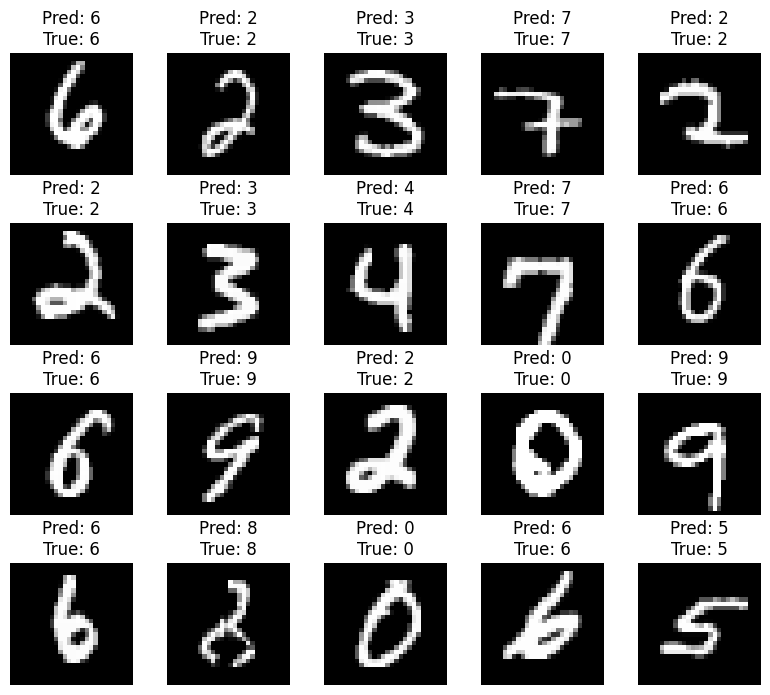

Number of correct predictions: 20
Number of false predictions: 0
Total number of predictions: 20


In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and preprocess the images
test_images = test_images / 255.0
test_images = np.expand_dims(test_images, axis=-1)  # Reshape to (n_samples, 28, 28, 1)

# Ensure model_custom is defined and trained
# For example:
# model_custom = build_model(custom_activation)  # Replace with actual model definition

# Select 20 random indices from the test set
np.random.seed(42)  # For reproducibility
random_indices = np.random.choice(len(test_images), 20, replace=False)

# Collect the random images and labels
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

# Make predictions
predictions = model_custom.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Initialize counters for correct and false predictions
correct_predictions = 0
false_predictions = 0

# Create a figure to display the results
fig, axes = plt.subplots(4, 5, figsize=(8, 7))
axes = axes.flatten()

# Display images and predictions
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i].squeeze(), cmap='gray')
    ax.set_title(f"Pred: {predicted_labels[i]}\nTrue: {sample_labels[i]}")
    ax.axis('off')
    
    if predicted_labels[i] == sample_labels[i]:
        correct_predictions += 1
    else:
        false_predictions += 1

plt.tight_layout()
plt.savefig('Model_Predictions.png',dpi=300)
plt.show()

# Print results
print(f"Number of correct predictions: {correct_predictions}")
print(f"Number of false predictions: {false_predictions}")
print(f"Total number of predictions: {len(sample_images)}")
